In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [93]:
test_dir="D:\cats$dog-classification\CNN classification\dataset\\test_set"
train_dir="D:\cats$dog-classification\CNN classification\dataset\\training_set"


train_dir_cats = train_dir + '\cats'
train_dir_dogs = train_dir + '\dogs'
test_dir_cats = test_dir + '\cats'
test_dir_dogs = test_dir + '\dogs'

In [94]:
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  4000
number of dogs training images -  4000
number of cats testing images -  1000
number of dogs testing images -  1000


In [103]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        zoom_range = 0.2,
        )

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
         directory='D:\cats$dog-classification\CNN classification\dataset\\training_set',
        target_size=(64, 64),
        batch_size=32,
        shuffle=True,
        class_mode='binary')


test_set = test_datagen.flow_from_directory(
         directory='D:\cats$dog-classification\CNN classification\dataset\\test_set',
        target_size=(64, 64),
        batch_size=32,
        shuffle=True,
        class_mode='binary') 

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [97]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,3,input_shape=(64,64,3),padding='same',activation='relu'),
        tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        

        tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
        tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(rate=0.5),

        tf.keras.layers.Conv2D(128,3,padding='same',activation='relu'),
        tf.keras.layers.Conv2D(128,3,padding='same',activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(rate=0.5),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(rate=0.5),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(rate=0.5),

        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [99]:


model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [100]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)       

In [105]:
Trained_model=model.fit_generator(training_set,
                        steps_per_epoch = len(training_set.filenames) // 32,
                        epochs =60,
                        validation_data =test_set,
                        validation_steps =len(test_set.filenames) //32
                                 )

model.save("modelcats&dogs.h5")

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 62 steps
Epoch 1/60
250/250 [==============================] - 340s 1s/step - loss: 0.6941 - accuracy: 0.4974 - val_loss: 0.6928 - val_accuracy: 0.5010
Epoch 2/60
250/250 [==============================] - 92s 369ms/step - loss: 0.6910 - accuracy: 0.5226 - val_loss: 0.6840 - val_accuracy: 0.5378
Epoch 3/60
250/250 [==============================] - 93s 373ms/step - loss: 0.6781 - accuracy: 0.5699 - val_loss: 0.6587 - val_accuracy: 0.6119
Epoch 4/60
250/250 [==============================] - 62s 250ms/step - loss: 0.6668 - accuracy: 0.5978 - val_loss: 0.6659 - val_accuracy: 0.5600
Epoch 5/60
250/250 [==============================] - 59s 236ms/step - loss: 0.6514 - accuracy: 0.6181 - val_loss: 0.6323 - val_accuracy: 0.6280
Epoch 6/60
250/250 [==============================] - 59s 235ms/step - loss: 0.6412 - accuracy: 0.6313 - val_loss: 0.6242 - val_accuracy: 0.6361
Epoch 7/60
250/250 [===================

Epoch 56/60
250/250 [==============================] - 60s 238ms/step - loss: 0.3493 - accuracy: 0.8581 - val_loss: 0.3315 - val_accuracy: 0.8639
Epoch 57/60
250/250 [==============================] - 59s 238ms/step - loss: 0.3472 - accuracy: 0.8611 - val_loss: 0.3572 - val_accuracy: 0.8483
Epoch 58/60
250/250 [==============================] - 59s 236ms/step - loss: 0.3436 - accuracy: 0.8618 - val_loss: 0.3493 - val_accuracy: 0.8634
Epoch 59/60
250/250 [==============================] - 59s 237ms/step - loss: 0.3430 - accuracy: 0.8577 - val_loss: 0.3384 - val_accuracy: 0.8584
Epoch 60/60
250/250 [==============================] - 60s 241ms/step - loss: 0.3432 - accuracy: 0.8599 - val_loss: 0.3799 - val_accuracy: 0.8286


In [106]:
Trained_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

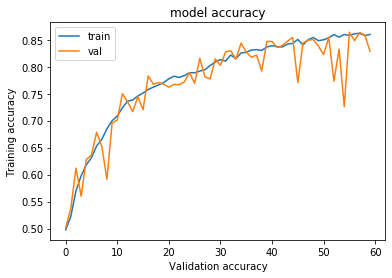

In [107]:
plt.plot(Trained_model.history['accuracy'])
plt.plot(Trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Training accuracy')
plt.xlabel('Validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

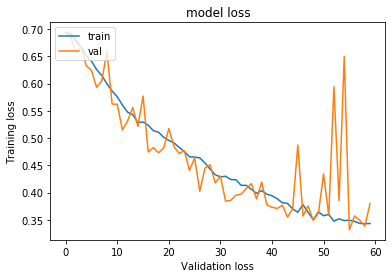

In [108]:
plt.plot(Trained_model.history['loss'])
plt.plot(Trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('Training loss')
plt.xlabel('Validation loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [128]:
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64,64))
    test_image = image.img_to_array(test_image)
    test_image=test_image/255.
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result>0.5:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction

In [129]:
print(testing_image(test_dir + '/cats/cat.4004.jpg'))

[[0.27435803]]
Cat


In [130]:
print(testing_image(test_dir + '/dogs/dog.4005.jpg'))

[[0.8609574]]
Dog
